In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('data/Iris.xls')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   iris         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df2 = sns.load_dataset('iris')

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# kiểm tra tình trạng mất cân bằng giữa các lớp
df['iris'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: iris, dtype: int64

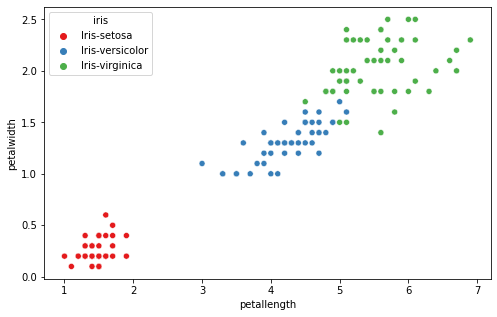

In [9]:
#trực quan hóa các điểm dữ liệu
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='petallength', y='petalwidth', hue='iris', palette='Set1')
plt.show()

In [11]:
# biến đổi thuộc tính phân loại --> sang kiểu số
# sử dụng LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [12]:
#khởi tạo model Encoder
encoder = LabelEncoder()

In [13]:
#biến đổi cột iris
df['species_num'] = encoder.fit_transform(df['iris'])

In [15]:
df.head()

,sepallength,sepalwidth,petallength,petalwidth,iris,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [16]:
df['species_num'].value_counts()

2    50
1    50
0    50
Name: species_num, dtype: int64

In [18]:
# chọn thuật toán KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [17]:
# chuẩn bị dữ liệu
X = df.drop(columns=['iris', 'species_num'])
y = df['species_num']

In [19]:
# tách dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# lựa chọn giá trị k phù hợp
from sklearn.metrics import accuracy_score

In [22]:
lst_k = [] #danh sách các giá trị k
lst_accuracy = [] #danh sách các độ chính xác tương ứng với các giá trị k
for k in range(2, 9):
    lst_k.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    yhat_test = knn.predict(X_test)
    accuracy = accuracy_score(y_true = y_test, y_pred=yhat_test) * 100
    lst_accuracy.append(accuracy)
    
    print('K =', k,'- Accuracy:', accuracy,'%')

K = 2 - Accuracy: 100.0 %
K = 3 - Accuracy: 100.0 %
K = 4 - Accuracy: 100.0 %
K = 5 - Accuracy: 100.0 %
K = 6 - Accuracy: 100.0 %
K = 7 - Accuracy: 96.66666666666667 %
K = 8 - Accuracy: 100.0 %


In [25]:
vitri = lst_accuracy.index(max(lst_accuracy))
k_best = lst_k[vitri]
print('Giá trị K phù hợp nhất là', k_best,'với accuracy là', lst_accuracy[vitri])

Giá trị K phù hợp nhất là 2 với accuracy là 100.0


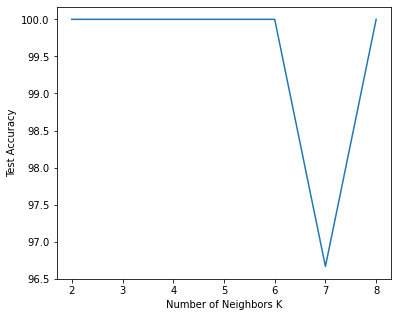

In [26]:
# trực quan kết quả theo k
plt.figure(figsize=(6,5))
plt.plot(lst_k, lst_accuracy)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Test Accuracy')
plt.show()

In [27]:
lst_k = [] #danh sách các giá trị k
lst_accuracy = [] #danh sách các độ chính xác tương ứng với các giá trị k
lst_score_train = [] #danh sách các score trên dữ liệu train
lst_score_test = [] #danh sách các score trên dữ liệu test
lst_diff_train_test = [] #danh sách các độ lệch giữa score train và score test
for k in range(2, 9):
    lst_k.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    yhat_test = knn.predict(X_test)
    accuracy = accuracy_score(y_true = y_test, y_pred=yhat_test) * 100
    lst_accuracy.append(accuracy)
    
    r2_train = knn.score(X_train, y_train)
    r2_test = knn.score(X_test, y_test)
    diff = np.abs(r2_train - r2_test)
    lst_score_train.append(r2_train)
    lst_score_test.append(r2_test)
    lst_diff_train_test.append(diff)
    
    print('K =', k,'- Accuracy:', accuracy,'% - R2 train:', r2_train,'- R2 test:', r2_test,
          '- Diff:', diff)

K = 2 - Accuracy: 100.0 % - R2 train: 0.9666666666666667 - R2 test: 1.0 - Diff: 0.033333333333333326
K = 3 - Accuracy: 100.0 % - R2 train: 0.95 - R2 test: 1.0 - Diff: 0.050000000000000044
K = 4 - Accuracy: 100.0 % - R2 train: 0.9583333333333334 - R2 test: 1.0 - Diff: 0.04166666666666663
K = 5 - Accuracy: 100.0 % - R2 train: 0.9666666666666667 - R2 test: 1.0 - Diff: 0.033333333333333326
K = 6 - Accuracy: 100.0 % - R2 train: 0.9666666666666667 - R2 test: 1.0 - Diff: 0.033333333333333326
K = 7 - Accuracy: 96.66666666666667 % - R2 train: 0.975 - R2 test: 0.9666666666666667 - Diff: 0.008333333333333304
K = 8 - Accuracy: 100.0 % - R2 train: 0.9583333333333334 - R2 test: 1.0 - Diff: 0.04166666666666663


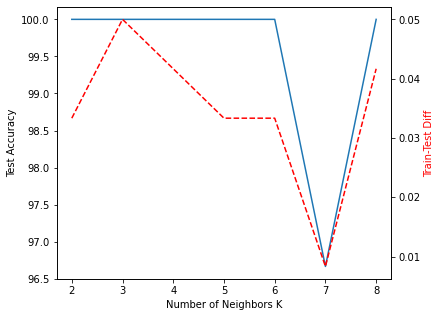

In [29]:
# trực quan kết quả theo k
fig, ax = plt.subplots(figsize=(6,5))
ax.plot(lst_k, lst_accuracy)
ax.set_xlabel('Number of Neighbors K')
ax.set_ylabel('Test Accuracy')

ax2 = ax.twinx()
ax2.plot(lst_k, lst_diff_train_test, color='red', linestyle='dashed')
ax2.set_ylabel('Train-Test Diff', color='red')
plt.show()

In [30]:
# sau khi chọn k=2 => áp dụng model với k đã chọn
model = KNeighborsClassifier(n_neighbors=2)

In [31]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [32]:
#kiểm tra độ chính xác
print('Trainning R^2 score:', model.score(X_train, y_train))
print('Testing R^2 score:', model.score(X_test, y_test))

Trainning R^2 score: 0.9666666666666667
Testing R^2 score: 1.0


In [33]:
yhat_test = model.predict(X_test)

In [35]:
df_test = pd.DataFrame({
    'Actual': y_test,
    'Prediction': yhat_test
})
df_test.head(10)

,Actual,Prediction
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1


In [38]:
# kiểm tra trên dữ liệu new
# sepallength	sepalwidth	petallength	petalwidth
X_new = np.array([[4.8, 3.3, 1.6, 0.24], [7.0, 2.4, 6.8, 2.5]])
y_new = model.predict(X_new)
y_new

array([0, 2])

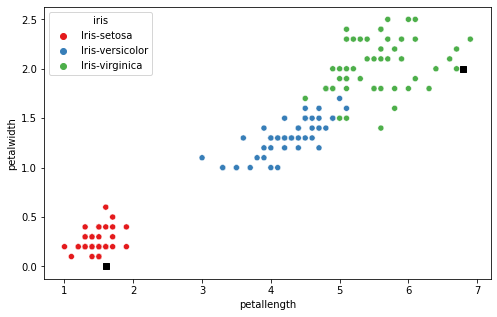

In [39]:
#trực quan hóa các điểm dữ liệu
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='petallength', y='petalwidth', hue='iris', palette='Set1')
plt.scatter(X_new[:, 2], y_new, color='k', marker='s')
plt.show()

In [40]:
# tính precision, recall, f-score
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [41]:
print('Confusion matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [43]:
f_score = f1_score(y_test, yhat_test, average='micro')
precision = precision_score(y_test, yhat_test, average='micro')
recall = recall_score(y_test, yhat_test, average='micro')

print('F1-score:', f_score)
print('Precision score:', precision)
print('Recall score:', recall)

F1-score: 1.0
Precision score: 1.0
Recall score: 1.0
